In [1]:
# Basic Imports
import sys
sys.path.insert(1, "../../")

import utils
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

# Imports for data preprocessing.
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Tensorflow imports
import tensorflow as tf

In [2]:
# Disable GPU
# tf.config.set_visible_devices([], 'GPU')

In [3]:
# Constants
DATA_FILE_NAME = '../../Data/final_crypto_data.csv'
SELECTED_MONTHS = [10,11,12,1,2,3]
SELECTED_FEATURES = [
        'reddit_compound_polarity',
		# 'quote_volume_24h',
        # 'volume_change_24h',
        # 'percent_change_1h',
        # 'percent_change_24h',
        # 'percent_change_7d',
		# 'high_24h',
        # 'last_24h',
        # 'bid_24h',
        # 'vwap_24h',
        # 'volume_24h',
        # 'low_24h',
        # 'ask_24h',
        # 'open_24h',
        'volume_1min',
        'high_1min',
        'low_1min',
        'open_1min',
        'close_1min'
    ]

In [4]:
df = pd.read_csv(DATA_FILE_NAME)
df = df[::15]
df

,Unnamed: 0,_id,high_24h,last_24h,unix_timestamp,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,...,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
0,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,1635527368,62559.74,60908.08,5113.537402,56425.0,62561.13,...,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
15,15,627127fabbd592fa2c7f25b8,62971.54,62541.28,1635527731,62531.62,60915.95,5121.220901,56425.0,62550.96,...,-0.366133,2.361134,2.388851,26.873643,29.945589,49.972913,1.179410e+12,43.4826,1.313374e+12,0.000834
30,30,627127fabbd592fa2c7f25c7,62971.54,62505.02,1635529300,62496.24,60950.29,5200.503262,56425.0,62502.94,...,-0.021597,2.406680,2.941529,26.873643,29.810102,49.972913,1.179112e+12,43.4826,1.313041e+12,0.123475
45,45,627127fabbd592fa2c7f25d6,62971.54,62385.18,1635530148,62384.03,60959.83,5218.017958,56425.0,62399.55,...,-0.543703,2.119603,2.870641,26.873643,29.471630,49.972913,1.176056e+12,43.4826,1.309639e+12,0.262691
60,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,1635530994,62394.14,60962.99,5204.297994,56425.0,62404.25,...,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246720,246720,62712800bbd592fa2c82e969,38786.95,38414.87,1651348288,38382.42,38519.83,594.586166,38160.4,38407.03,...,0.270777,0.247061,-3.430754,-16.083945,-12.392731,2.109056,7.302011e+11,42.0843,8.059303e+11,0.190067
246735,246735,62712800bbd592fa2c82e978,38786.95,38445.18,1651349318,38431.28,38539.51,563.808424,38160.4,38445.72,...,0.232198,0.148902,-3.406210,-15.717118,-12.409961,2.722041,7.317070e+11,42.0415,8.075924e+11,0.401900
246750,246750,62712800bbd592fa2c82e987,38786.95,38384.58,1651350349,38370.64,38540.97,566.041421,38160.4,38384.58,...,0.135730,-0.319612,-3.488027,-16.027128,-12.412714,1.877778,7.305612e+11,42.0036,8.063239e+11,-0.171560
246765,246765,62712800bbd592fa2c82e996,38786.95,38351.20,1651351078,38331.79,38540.81,566.041421,38160.4,38350.37,...,0.002831,-0.417371,-3.630196,-16.079912,-12.589880,1.793039,7.299792e+11,42.0415,8.056816e+11,-0.096760


In [5]:
# Drop unnecessary columns
df = utils.setDateTimeAsIndex(df)
df = utils.filterColumns(df, SELECTED_FEATURES)
df = utils.filterInMonths(df, SELECTED_MONTHS)
df

,reddit_compound_polarity,volume_1min,high_1min,low_1min,open_1min,close_1min
datetime,,,,,,
2021-10-29 17:09:28,0.000834,1.425169,62565.90,62539.20,62545.45,62561.86
2021-10-29 17:15:31,0.000834,1.382506,62554.21,62486.12,62513.02,62531.42
2021-10-29 17:41:40,0.123475,0.299922,62552.18,62505.02,62552.18,62516.47
2021-10-29 17:55:48,0.262691,0.104318,62397.39,62366.89,62397.39,62385.18
2021-10-29 18:09:54,0.044513,3.846862,62407.86,62368.24,62385.41,62397.57
...,...,...,...,...,...,...
2022-03-29 13:49:57,0.159400,4.127755,47674.37,47597.27,47657.99,47603.68
2022-03-29 14:03:04,0.567486,0.007683,47744.40,47744.40,47744.40,47744.40
2022-03-29 14:20:16,0.598674,0.002850,47708.53,47708.53,47708.53,47708.53


In [6]:
# check for null values per column
print("NaN values per column count: \n")
df.isna().sum()

NaN values per column count: 



reddit_compound_polarity    0
volume_1min                 0
high_1min                   0
low_1min                    0
open_1min                   0
close_1min                  0
dtype: int64

In [7]:
values = df.values
i = 1

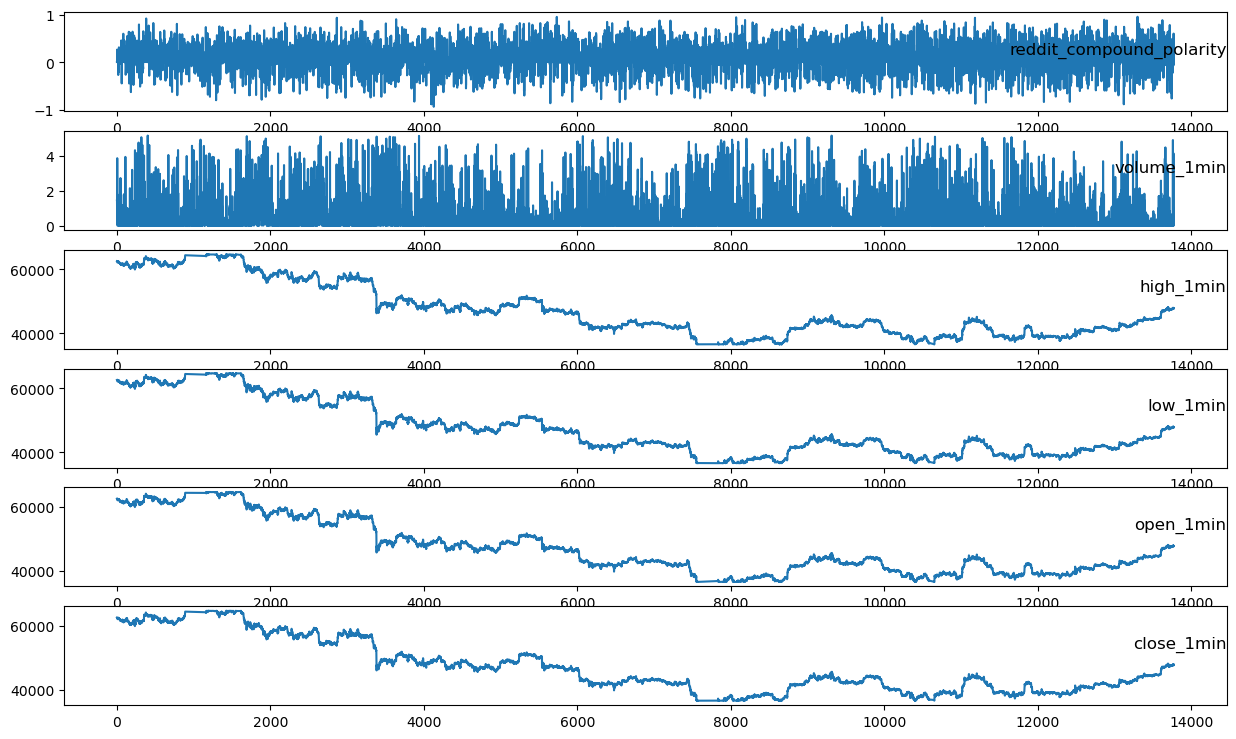

In [8]:
# plot each column
plt.figure(figsize=(15,9))
for group in range(len(SELECTED_FEATURES)) :
	plt.subplot(len(SELECTED_FEATURES), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [9]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, doPrints=False):
	"""
	:param data: Ta data pou theloume na metasximatisoume se numpy Array
	:param n_in: to plithos ton Lags pou tha exei i input series (X)
	:param n_out: to plithos ton Lags pou tha exei i output series (y)
	:param dropnan: ama theloume na kanoume drop ta nan valuws
	:return: epistrefei tin metasximatismeni lista se multivariate time series.
	"""

	# vreiskei to n_vars
	# an ta data einai list = 1
	# alliws pernei to shape ton data.
	n_vars = 1 if type(data) is list else data.shape[1]

	# kanoume ta data DataFrame
	mDf = pd.DataFrame(data)
	if doPrints:
		print(mDf)

	# ftiaxnei 2 adies listes. mia fia ta
	cols, names = list(), list()
	if doPrints:
		print(n_vars)

	# ftiaxnoume to input series X. (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		# kanoume append sto cols to dataframe olistimeno kata i rows
		cols.append(mDf.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	# ftiaxnoume to forecast sequence y (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(mDf.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	if doPrints:
		print(cols)
		print(names)

	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [10]:
# get dataframe values.
values = df.values
values

array([[ 8.33660422e-04,  1.42516865e+00,  6.25659000e+04,
         6.25392000e+04,  6.25454500e+04,  6.25618600e+04],
       [ 8.34156501e-04,  1.38250593e+00,  6.25542100e+04,
         6.24861200e+04,  6.25130200e+04,  6.25314200e+04],
       [ 1.23475000e-01,  2.99922230e-01,  6.25521800e+04,
         6.25050200e+04,  6.25521800e+04,  6.25164700e+04],
       ...,
       [ 5.98673783e-01,  2.85000000e-03,  4.77085300e+04,
         4.77085300e+04,  4.77085300e+04,  4.77085300e+04],
       [ 4.11538759e-01,  9.98932800e-01,  4.78502500e+04,
         4.77994200e+04,  4.78502500e+04,  4.77994200e+04],
       [-3.83863363e-02,  3.00040000e-02,  4.78746700e+04,
         4.78480300e+04,  4.78480300e+04,  4.78746700e+04]])

In [11]:
# Ensure all data are float.
values = values.astype('float32')
values

array([[ 8.3366042e-04,  1.4251686e+00,  6.2565898e+04,  6.2539199e+04,
         6.2545449e+04,  6.2561859e+04],
       [ 8.3415653e-04,  1.3825059e+00,  6.2554211e+04,  6.2486121e+04,
         6.2513020e+04,  6.2531422e+04],
       [ 1.2347500e-01,  2.9992223e-01,  6.2552180e+04,  6.2505020e+04,
         6.2552180e+04,  6.2516469e+04],
       ...,
       [ 5.9867376e-01,  2.8500000e-03,  4.7708531e+04,  4.7708531e+04,
         4.7708531e+04,  4.7708531e+04],
       [ 4.1153875e-01,  9.9893278e-01,  4.7850250e+04,  4.7799422e+04,
         4.7850250e+04,  4.7799422e+04],
       [-3.8386337e-02,  3.0004000e-02,  4.7874672e+04,  4.7848031e+04,
         4.7848031e+04,  4.7874672e+04]], dtype=float32)

In [12]:
# Normalize Continues Features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
scaled_values

array([[4.9725229e-01, 2.7734685e-01, 9.2514467e-01, 9.2489862e-01,
        9.2472172e-01, 9.2534935e-01],
       [4.9725255e-01, 2.6904443e-01, 9.2472863e-01, 9.2300916e-01,
        9.2356730e-01, 9.2426574e-01],
       [5.6205505e-01, 5.8366768e-02, 9.2465639e-01, 9.2368197e-01,
        9.2496133e-01, 9.2373335e-01],
       ...,
       [8.1314653e-01, 5.5462809e-04, 3.9624119e-01, 3.9697123e-01,
        3.9652598e-01, 3.9657569e-01],
       [7.1426582e-01, 1.9439866e-01, 4.0128624e-01, 4.0020669e-01,
        4.0157127e-01, 3.9981139e-01],
       [4.7652873e-01, 5.8389688e-03, 4.0215564e-01, 4.0193701e-01,
        4.0149224e-01, 4.0249026e-01]], dtype=float32)

In [13]:
# specify the number of lag hours
n_hours = 15
n_features = len(SELECTED_FEATURES)
n_obs = n_hours * n_features

In [14]:
# prepare data for lstm
reframed = series_to_supervised(scaled_values, n_in=n_hours,n_out=1)
reframed

,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
15,0.497252,0.277347,0.925145,0.924899,0.924722,0.925349,0.497253,0.269044,0.924729,0.923009,...,0.922883,0.922146,0.923188,0.921789,0.496812,0.273539,0.920676,0.920317,0.920674,0.921024
16,0.497253,0.269044,0.924729,0.923009,0.923567,0.924266,0.562055,0.058367,0.924656,0.923682,...,0.920676,0.920317,0.920674,0.921024,0.542391,0.000000,0.922103,0.922807,0.922407,0.922451
17,0.562055,0.058367,0.924656,0.923682,0.924961,0.923733,0.635616,0.020301,0.919146,0.918765,...,0.922103,0.922807,0.922407,0.922451,0.353248,0.002119,0.916370,0.916539,0.916675,0.916719
18,0.635616,0.020301,0.919146,0.918765,0.919451,0.919060,0.520332,0.748624,0.919519,0.918813,...,0.916370,0.916539,0.916675,0.916719,0.495813,0.042463,0.916504,0.916660,0.916404,0.916613
19,0.520332,0.748624,0.919519,0.918813,0.919024,0.919501,0.497046,0.080173,0.912844,0.912877,...,0.916504,0.916660,0.916404,0.916613,0.484745,0.042805,0.922044,0.921867,0.921915,0.921511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13766,0.598243,0.121635,0.393113,0.392594,0.392954,0.392198,0.568447,0.001028,0.390681,0.391412,...,0.404000,0.403399,0.403546,0.403004,0.581038,0.803287,0.395025,0.393011,0.394727,0.392843
13767,0.568447,0.001028,0.390681,0.391412,0.390966,0.391016,0.742963,0.002141,0.391060,0.391790,...,0.395025,0.393011,0.394727,0.392843,0.796667,0.001495,0.397518,0.398248,0.397803,0.397853
13768,0.742963,0.002141,0.391060,0.391790,0.391345,0.391394,0.496812,0.001135,0.391787,0.391941,...,0.397518,0.398248,0.397803,0.397853,0.813147,0.000555,0.396241,0.396971,0.396526,0.396576
13769,0.496812,0.001135,0.391787,0.391941,0.392072,0.391545,0.496812,0.012274,0.393000,0.393591,...,0.396241,0.396971,0.396526,0.396576,0.714266,0.194399,0.401286,0.400207,0.401571,0.399811


In [15]:
def train_test_valid_split(total_x, total_y, train_size=0.8, valid_size=0.1) :
    train_index = int(len(total_x) * train_size)
    valid_index = int(len(total_x) * valid_size)

    X_train, y_train = total_x[0 :train_index], total_y[0 :train_index]
    X_valid, y_valid = total_x[train_index :train_index + valid_index], total_y[train_index :train_index + valid_index]
    X_test, y_test = total_x[train_index + valid_index :], total_y[train_index + valid_index :]

    print("-------- train test valid split --------")
    print(len(X_train)), print(len(y_train))
    print(len(X_valid)), print(len(y_valid))
    print(len(X_test)), print(len(y_test))
    print("----------------------------------------")

    return np.array(X_train), \
           np.array(y_train), \
           np.array(X_valid), \
           np.array(y_valid), \
           np.array(X_test), \
           np.array(y_test)

In [16]:
# split into train and test sets
values = reframed.values
# cutoff = round(0.70 * len(values))
# values = values[cutoff:,:]
values

array([[0.4972523 , 0.27734685, 0.9251447 , ..., 0.9203172 , 0.9206741 ,
        0.92102444],
       [0.49725255, 0.26904443, 0.92472863, ..., 0.922807  , 0.9224074 ,
        0.9224509 ],
       [0.56205505, 0.05836677, 0.9246564 , ..., 0.91653943, 0.9166751 ,
        0.9167186 ],
       ...,
       [0.74296343, 0.00214143, 0.3910601 , ..., 0.39697123, 0.39652598,
        0.3965757 ],
       [0.49681178, 0.0011346 , 0.39178705, ..., 0.40020669, 0.40157127,
        0.3998114 ],
       [0.49681178, 0.01227394, 0.3929999 , ..., 0.401937  , 0.40149224,
        0.40249026]], dtype=float32)

In [17]:
X =  values[:,:n_obs]
X

array([[0.4972523 , 0.27734685, 0.9251447 , ..., 0.9221456 , 0.92318773,
        0.9217893 ],
       [0.49725255, 0.26904443, 0.92472863, ..., 0.9203172 , 0.9206741 ,
        0.92102444],
       [0.56205505, 0.05836677, 0.9246564 , ..., 0.922807  , 0.9224074 ,
        0.9224509 ],
       ...,
       [0.74296343, 0.00214143, 0.3910601 , ..., 0.39824808, 0.39780295,
        0.39785254],
       [0.49681178, 0.0011346 , 0.39178705, ..., 0.39697123, 0.39652598,
        0.3965757 ],
       [0.49681178, 0.01227394, 0.3929999 , ..., 0.40020669, 0.40157127,
        0.3998114 ]], dtype=float32)

In [18]:
y = values[:,-1]
y

array([0.92102444, 0.9224509 , 0.9167186 , ..., 0.3965757 , 0.3998114 ,
       0.40249026], dtype=float32)

In [19]:
train_X, train_y, valid_X, valid_y, test_X, test_y = train_test_valid_split(
	X,
	y,
	train_size=0.8,
	valid_size=0.1
)
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
11004
11004
1375
1375
1377
1377
----------------------------------------
----------------------------
-------- Train X: (11004, 90), Train y: (11004,) --------
-------- Valid X: (1375, 90), Valid y: (1375,) --------
-------- Test X: (1377, 90), Test y: (1377,) --------
----------------------------



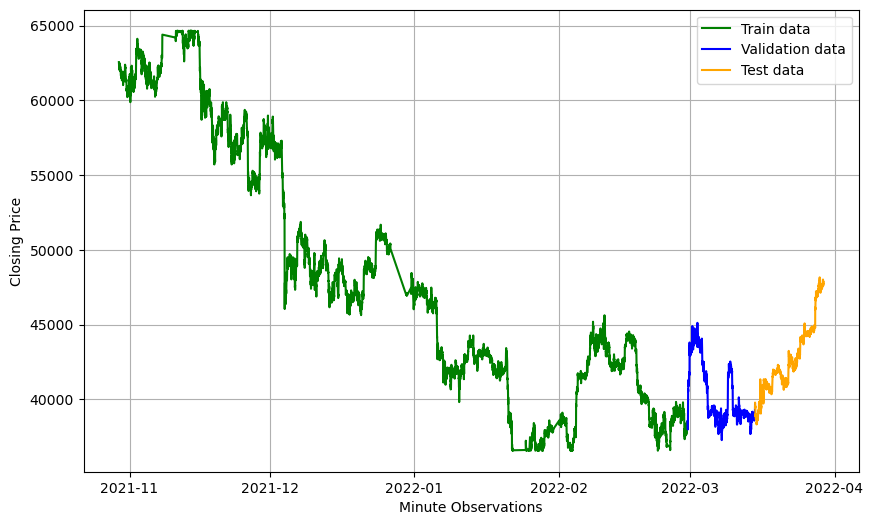

In [20]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df['close_1min'][:len(train_y)], 'green', label='Train data')
plt.plot(df['close_1min'][len(train_y):len(train_y)+len(valid_y)], 'blue', label='Validation data')
plt.plot(df['close_1min'][len(train_y)+len(valid_y):], 'orange', label='Test data')
plt.legend()

In [21]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
valid_X = valid_X.reshape((valid_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape)

(11004, 15, 6) (11004,) (1375, 15, 6) (1375,)


In [22]:
 # Network Configurations
EPOCHS = 50
BATCH_SIZE = 32

In [23]:
# design network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(
	64,
	# return_sequences=True,
	# activation='relu',
	# unroll=True,
	input_shape=(train_X.shape[1], train_X.shape[2]),
))
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.LSTM(
# 	32,
# 	# activation='relu',
# 	# unroll=True,
# ))
# model.add(Dropout(0.2))
# model.add(Dense(BATCH_SIZE))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

Metal device set to: Apple M1 Pro


2023-01-12 23:09:54.763871: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-12 23:09:54.764265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
# fit network
history = model.fit(
	train_X,
	train_y,
	epochs=EPOCHS,
	batch_size=BATCH_SIZE,
	validation_data=(valid_X, valid_y),
	verbose=2,
	shuffle=False
)

Epoch 1/50


2023-01-12 23:09:55.122267: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-12 23:09:55.941244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-12 23:09:56.158782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-12 23:09:56.324879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-12 23:09:59.742297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-12 23:09:59.781110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


344/344 - 5s - loss: 0.0075 - val_loss: 7.1884e-04 - 5s/epoch - 14ms/step
Epoch 2/50
344/344 - 3s - loss: 0.0013 - val_loss: 2.1788e-04 - 3s/epoch - 9ms/step
Epoch 3/50
344/344 - 3s - loss: 7.8543e-04 - val_loss: 1.5770e-04 - 3s/epoch - 9ms/step
Epoch 4/50
344/344 - 3s - loss: 5.4264e-04 - val_loss: 1.2955e-04 - 3s/epoch - 9ms/step
Epoch 5/50
344/344 - 3s - loss: 4.5866e-04 - val_loss: 1.4088e-04 - 3s/epoch - 9ms/step
Epoch 6/50
344/344 - 3s - loss: 4.4238e-04 - val_loss: 1.8857e-04 - 3s/epoch - 9ms/step
Epoch 7/50
344/344 - 3s - loss: 4.4621e-04 - val_loss: 1.5931e-04 - 3s/epoch - 9ms/step
Epoch 8/50
344/344 - 3s - loss: 4.4900e-04 - val_loss: 1.6745e-04 - 3s/epoch - 10ms/step
Epoch 9/50
344/344 - 3s - loss: 4.4222e-04 - val_loss: 1.5849e-04 - 3s/epoch - 9ms/step
Epoch 10/50
344/344 - 3s - loss: 4.4705e-04 - val_loss: 1.6645e-04 - 3s/epoch - 9ms/step
Epoch 11/50
344/344 - 3s - loss: 4.0870e-04 - val_loss: 1.4228e-04 - 3s/epoch - 9ms/step
Epoch 12/50
344/344 - 3s - loss: 3.9310e-04 - v

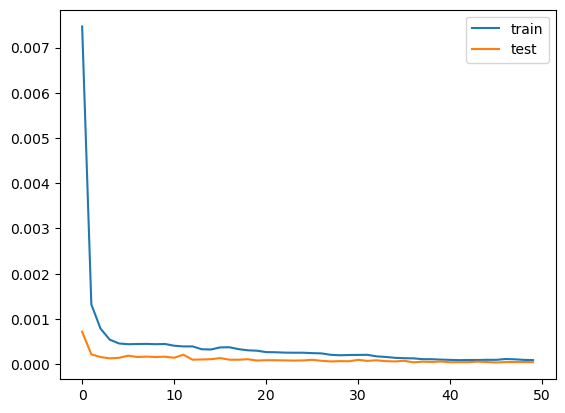

In [25]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [26]:
# make a prediction
yhat = model.predict(valid_X)
valid_X = valid_X.reshape((valid_X.shape[0], n_hours*n_features))
valid_X

28/43 [==================>...........] - ETA: 0s

2023-01-12 23:12:36.448803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-12 23:12:36.493068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 1s 4ms/step


array([[0.5240768 , 0.09502239, 0.07203674, ..., 0.15324366, 0.1527772 ,
        0.15460467],
       [0.48352087, 0.00171496, 0.06574392, ..., 0.16528702, 0.16577649,
        0.16487408],
       [0.48864737, 0.00456936, 0.05867863, ..., 0.15941966, 0.15895379,
        0.15900624],
       ...,
       [0.6514505 , 0.40636662, 0.08851826, ..., 0.08409989, 0.08439326,
        0.08425689],
       [0.6544379 , 0.47694662, 0.10435891, ..., 0.08463061, 0.0841583 ,
        0.08421171],
       [0.49681178, 0.        , 0.11083972, ..., 0.08832133, 0.08858085,
        0.08790267]], dtype=float32)

In [27]:
# invert scaling for forecast
inv_yhat = np.concatenate((valid_X[:, -(n_features-1):], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

In [28]:
# invert scaling for actual
valid_y_new = valid_y.reshape((len(valid_y), 1))
inv_y = np.concatenate((valid_X[:, -(n_features-1):], valid_y_new), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [29]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 188.731


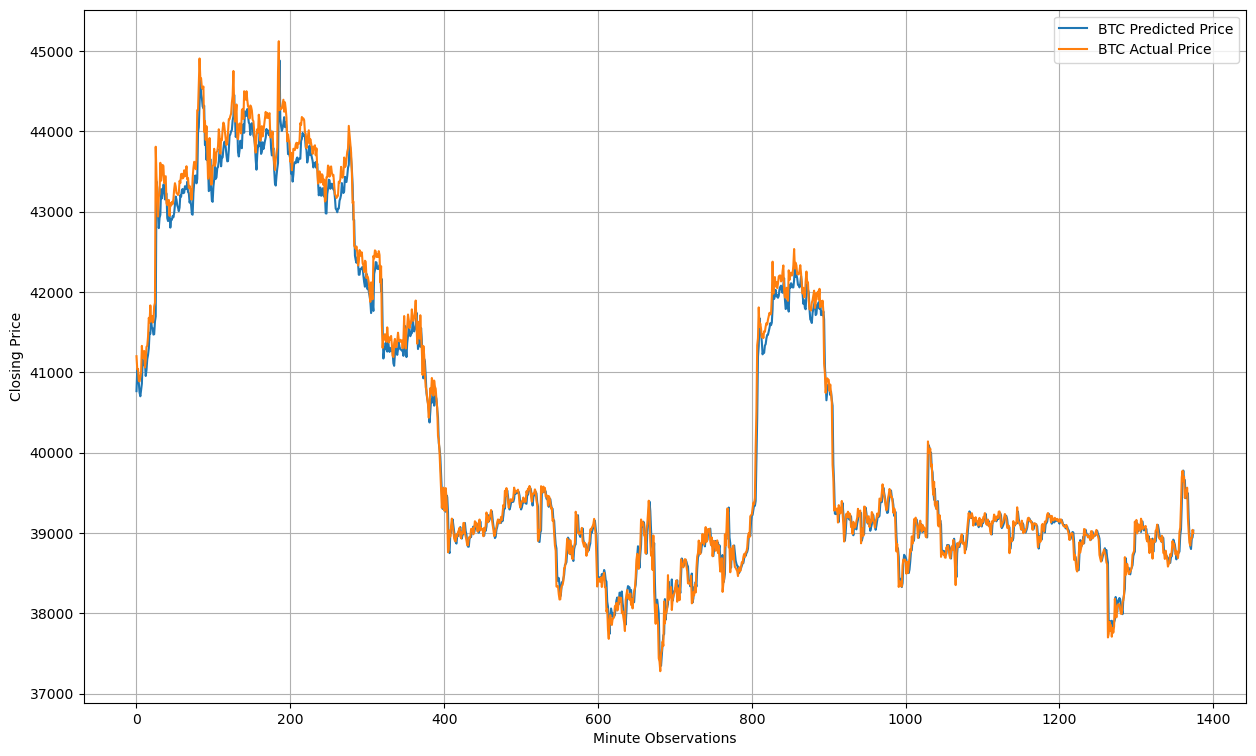

In [30]:
plt.figure(figsize=(15,9))
plt.grid(True)

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(inv_yhat, label='BTC Predicted Price')
plt.plot(inv_y, label='BTC Actual Price')
plt.legend()

In [31]:
test_yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
test_X

44/44 [==============================] - 0s 6ms/step


array([[0.49681178, 0.23305492, 0.11375272, ..., 0.08623755, 0.08576524,
        0.0864501 ],
       [0.2026909 , 0.20252128, 0.1095475 , ..., 0.08505857, 0.08498073,
        0.08463955],
       [0.20228577, 0.00230414, 0.11114228, ..., 0.08284652, 0.08262718,
        0.08242738],
       ...,
       [0.74296343, 0.00214143, 0.3910601 , ..., 0.39824808, 0.39780295,
        0.39785254],
       [0.49681178, 0.0011346 , 0.39178705, ..., 0.39697123, 0.39652598,
        0.3965757 ],
       [0.49681178, 0.01227394, 0.3929999 , ..., 0.40020669, 0.40157127,
        0.3998114 ]], dtype=float32)

In [32]:
# invert scaling for forecast
test_inv_yhat = np.concatenate((test_X[:, -(n_features-1):], test_yhat), axis=1)
test_inv_yhat = scaler.inverse_transform(test_inv_yhat)
test_inv_yhat = test_inv_yhat[:,-1]

In [33]:
# invert scaling for actual
test_y_new = test_y.reshape((len(test_y), 1))
test_inv_y = np.concatenate((test_X[:, -(n_features-1):], test_y_new), axis=1)
test_inv_y = scaler.inverse_transform(test_inv_y)
test_inv_y = test_inv_y[:,-1]

In [34]:
# calculate RMSE
rmse = sqrt(mean_squared_error(test_inv_y, test_inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 218.924


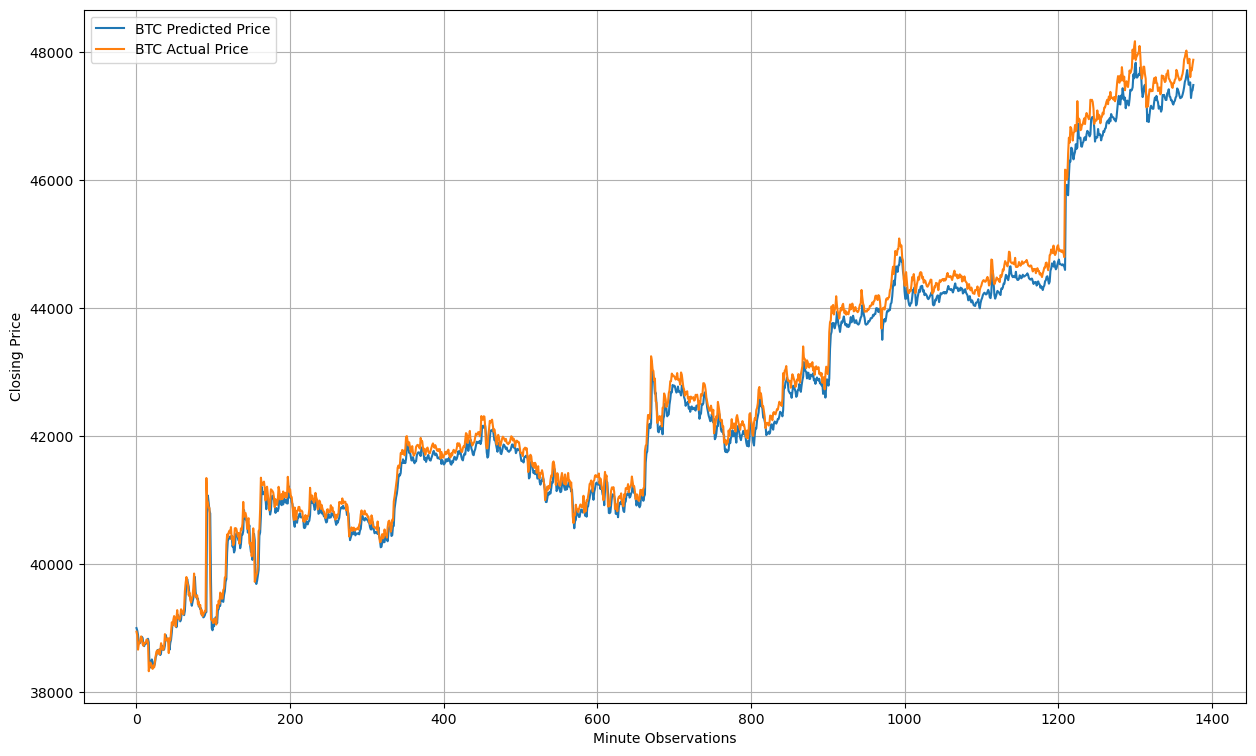

In [35]:
plt.figure(figsize=(15,9))
plt.grid(True)

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(test_inv_yhat, label='BTC Predicted Price')
plt.plot(test_inv_y, label='BTC Actual Price')
plt.legend()